# BigDL object detection demo

This notebook shows how to use pretrained BigDL model in customized dataset to detect Messi.

In [1]:
from bigdl.zoo.objectdetection import *
from bigdl.util.common import *
from bigdl.transform.vision.image import *
from bigdl.zoo.models import *
from IPython.display import Image, display
%matplotlib inline
from bigdl.nn.layer import Model
import os
from moviepy.editor import *
from IPython.display import Image
from IPython.display import display

JavaCreator.set_creator_class("com.intel.analytics.zoo.models.pythonapi.PythonModels")
init_engine()

Download [model](https://s3-ap-southeast-1.amazonaws.com/bigdl-models/object-detection/bigdl_messi.model)

Download [Video Clip](https://s3-ap-southeast-1.amazonaws.com/bigdl-models/object-detection/messi_clip.mp4)

In [2]:
## load and quantize model

model = Model.loadModel("bigdl_messi.model").quantize()
print 'load model done'

load model done


In [3]:
# load data
path = "messi_clip.mp4"
myclip = VideoFileClip(path)

video_rdd = sc.parallelize(myclip.iter_frames(fps=5))
image_frame = DistributedImageFrame(video_rdd)

creating: createDistributedImageFrame


In [4]:
# Define Predictor Configure
preprocess = Pipeline([Resize(300, 300), ChannelNormalize(123.0, 117.0, 104.0), MatToTensor(), ImageFrameToSample()])
postprocess = ScaleDetection()

label_map = {0: '__background__', 1: 'messi'}
configure = Configure(preprocess, postprocess, 2, label_map)

creating: createResize
creating: createChannelNormalize
creating: createMatToTensor
creating: createImageFrameToSample
creating: createPipeline
creating: createScaleDetection
creating: createConfigure


In [5]:
# Predict and visualize detection back to clips

predictor = Predictor(model, configure)

output = predictor.predict(image_frame)

visualizer = Visualizer(predictor.configure.label_map())
results = visualizer(output).get_image(to_chw=False).collect()



creating: createPredictor
creating: createVisualizer


In [6]:
# save clip to file
clip = ImageSequenceClip(results, fps=5)

output_path = '/tmp/out.mp4'
%time clip.write_videofile(output_path, audio=False)
clip.write_gif("messi.gif")

[MoviePy] >>>> Building video /tmp/out.mp4
[MoviePy] Writing video /tmp/out.mp4


100%|██████████| 51/51 [00:00<00:00, 116.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /tmp/out.mp4 

CPU times: user 156 ms, sys: 40 ms, total: 196 ms
Wall time: 1.41 s

[MoviePy] Building file messi.gif with imageio


100%|██████████| 51/51 [00:10<00:00,  4.89it/s]


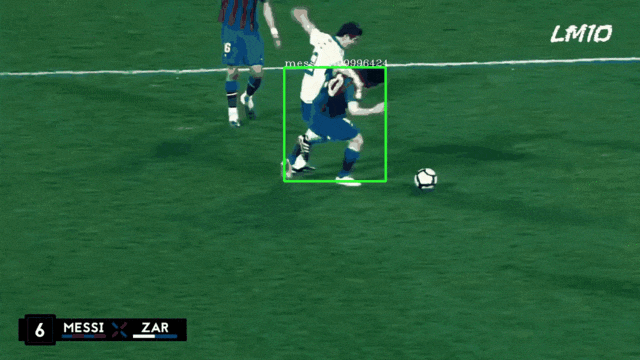

In [2]:
with open("messi.gif",'rb') as f:
    display(Image(f.read()))